# 导入必要的库

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers #这个是为了便于后面的书写，不用再写很长的一串，比如keras.layers.Dense ==> layers.Dense
from tensorflow.keras.models import Sequential


# 数据检测

In [2]:
import pathlib
data_dir='../input/traindog-vs-cat/train'
data_dir=pathlib.Path(data_dir)

In [3]:
data_dir.glob('*/*.jpg')

<generator object Path.glob at 0x7f03eef04850>

In [4]:
image_count=len(list(data_dir.glob('*/*.jpg')))

In [5]:
image_count

25000

In [6]:
cats=list(data_dir.glob('cat/*'))  # data_dir 它是关联的 train文件夹，所以后面glob加的参数cats就代表了：train/cats

In [7]:
cats

[PosixPath('../input/traindog-vs-cat/train/cat/cat.12461.jpg'),
 PosixPath('../input/traindog-vs-cat/train/cat/cat.10176.jpg'),
 PosixPath('../input/traindog-vs-cat/train/cat/cat.8194.jpg'),
 PosixPath('../input/traindog-vs-cat/train/cat/cat.3498.jpg'),
 PosixPath('../input/traindog-vs-cat/train/cat/cat.891.jpg'),
 PosixPath('../input/traindog-vs-cat/train/cat/cat.6912.jpg'),
 PosixPath('../input/traindog-vs-cat/train/cat/cat.6932.jpg'),
 PosixPath('../input/traindog-vs-cat/train/cat/cat.2842.jpg'),
 PosixPath('../input/traindog-vs-cat/train/cat/cat.8762.jpg'),
 PosixPath('../input/traindog-vs-cat/train/cat/cat.10692.jpg'),
 PosixPath('../input/traindog-vs-cat/train/cat/cat.7083.jpg'),
 PosixPath('../input/traindog-vs-cat/train/cat/cat.1.jpg'),
 PosixPath('../input/traindog-vs-cat/train/cat/cat.9820.jpg'),
 PosixPath('../input/traindog-vs-cat/train/cat/cat.115.jpg'),
 PosixPath('../input/traindog-vs-cat/train/cat/cat.3921.jpg'),
 PosixPath('../input/traindog-vs-cat/train/cat/cat.6212.j

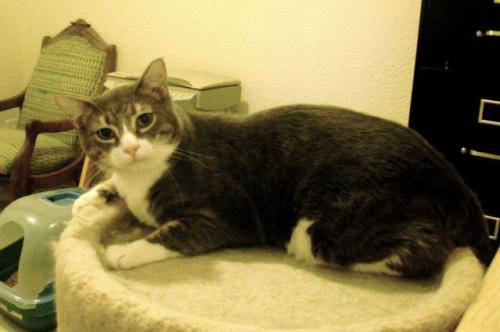

In [8]:
Image.open(cats[3])

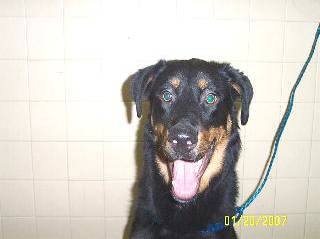

In [9]:
dogs=list(data_dir.glob('dog/*'))
Image.open(dogs[0])

# 对数据进行处理，形成供给神经网络的数据集

## 创建一个dataset对象

In [10]:
batch_size=32
img_height=180
img_width=180

In [11]:
train_ds=tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='training',
    seed=123,  #随机数种子，只要指定了这个数值，那么每次调用这个方法，产生的验证集和训练集都是相同的。 为了便于算法复现。
    image_size=(img_height,img_width), #在进行划分的时候，同时处理图像的大小
    batch_size=batch_size    
)

Found 25000 files belonging to 2 classes.
Using 20000 files for training.


2022-04-07 07:41:49.420403: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-07 07:41:49.516659: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-07 07:41:49.517417: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-07 07:41:49.520328: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [12]:
val_ds=tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='validation',
    seed=123,  #随机数种子，只要指定了这个数值，那么每次调用这个方法，产生的验证集和训练集都是相同的。 为了便于算法复现。
    image_size=(img_height,img_width), #在进行划分的时候，同时处理图像的大小
    batch_size=batch_size    
)

Found 25000 files belonging to 2 classes.
Using 5000 files for validation.


In [13]:
class_names=train_ds.class_names

In [14]:
class_names

['cat', 'dog']

In [15]:
val_ds.class_names

['cat', 'dog']

In [16]:
dir(train_ds)

['_GeneratorState',
 '__abstractmethods__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_add_variable_with_custom_getter',
 '_apply_debug_options',
 '_as_serialized_graph',
 '_batch_size',
 '_checkpoint_dependencies',
 '_consumers',
 '_deferred_dependencies',
 '_drop_remainder',
 '_flat_shapes',
 '_flat_structure',
 '_flat_types',
 '_functions',
 '_gather_saveables_for_checkpoint',
 '_graph',
 '_graph_attr',
 '_handle_deferred_dependencies',
 '_input_dataset',
 '_inputs',
 '_list_extra_dependencies_for_serialization',
 '_list_functions_for_serialization',
 '_lookup_dependency',
 '_ma

In [17]:
for image_batch,labels_batch in train_ds:
    print(image_batch.shape) #结果是：(32, 180, 180, 3)，代表了一个批次有32张图片，每个图片是180*180的3通道图像
    print(labels_batch.shape) # 结果是：(32,)，代表了图像的标签
    print(image_batch)
    print(labels_batch) #用数字代表的类别
    break

2022-04-07 07:41:57.031282: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


(32, 180, 180, 3)
(32,)
tf.Tensor(
[[[[ 43.31389    37.31389    49.31389  ]
   [ 49.556595   43.556595   54.23993  ]
   [ 47.541668   44.541668   53.541668 ]
   ...
   [ 63.597248   39.319416   52.319416 ]
   [ 64.770134   32.77013    47.08678  ]
   [ 71.73889    35.73889    47.73889  ]]

  [[ 44.58229    42.136112   53.136112 ]
   [ 51.15521    49.191666   58.463543 ]
   [ 50.819443   49.819443   57.819443 ]
   ...
   [ 62.22574    36.375      50.161453 ]
   [ 74.68022    42.68022    56.996872 ]
   [ 80.61389    44.61389    56.61389  ]]

  [[ 44.630787   46.44734    55.852894 ]
   [ 52.07465    52.800694   61.242016 ]
   [ 52.403355   52.403355   60.403355 ]
   ...
   [ 65.44335    38.55558    52.12504  ]
   [ 81.54134    49.541348   62.541348 ]
   [ 86.82223    50.822224   62.822224 ]]

  ...

  [[ 36.886112   35.886112   33.886112 ]
   [ 40.658333   41.975      40.63333  ]
   [ 40.         44.         43.       ]
   ...
   [139.56943   123.2778    118.70834  ]
   [137.70834   124.70

## 对dataset进行一些配置，以便得到高性能的数据集

In [18]:
AUTOTUNE=tf.data.AUTOTUNE

train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds=val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## 对数据进行归一化处理（标准化）

In [19]:
normalization_layer=layers.experimental.preprocessing.Rescaling(1./255)

In [20]:
normalized_ds=train_ds.map(lambda x,y: (normalization_layer(x),y))
image_batch,labels_batch=next(iter(normalized_ds))
first_image=image_batch[0]

2022-04-07 07:42:08.949063: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 130 of 1000
2022-04-07 07:42:18.896050: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 268 of 1000
2022-04-07 07:42:28.941961: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 410 of 1000
2022-04-07 07:42:38.943966: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 545 of 1000
2022-04-07 07:42:44.271689: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


In [21]:
np.min(first_image)

0.0

In [22]:
np.max(first_image)

1.0

# 创建模型

In [23]:
num_classes=5

In [24]:
model=Sequential(
[
    layers.experimental.preprocessing.Rescaling(1./255,input_shape=(img_height,img_width,3)),#标准化层，原来用的flatten
    layers.Conv2D(16,3,padding='same',activation='relu'), #用了一个卷积层，设定16个卷积核，每个卷积核的大小是3*3，激活函数是relu
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'), #用了一个卷积层，设定16个卷积核，每个卷积核大小3*3，激活函数是relu
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'), #用了一个卷积层，设定16个卷积核，每个卷积核大小3*3，激活函数是relu
    layers.MaxPooling2D(),    
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes)
    
]
)

# 编译模型

In [25]:
model.compile(
    optimizer='adam', # 优化器
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), #损失函数
    metrics=['accuracy'] #指标

)

# 查看创建的模型信息

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0

# 训练网络

In [27]:
epochs=10
history=model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/10


2022-04-07 07:42:46.725229: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


625/625 [==============================] - 27s 32ms/step - loss: 0.6192 - accuracy: 0.6559 - val_loss: 0.5357 - val_accuracy: 0.7328
Epoch 2/10
625/625 [==============================] - 8s 13ms/step - loss: 0.4990 - accuracy: 0.7546 - val_loss: 0.4605 - val_accuracy: 0.7840
Epoch 3/10
625/625 [==============================] - 8s 14ms/step - loss: 0.4248 - accuracy: 0.8061 - val_loss: 0.4616 - val_accuracy: 0.7782
Epoch 4/10
625/625 [==============================] - 8s 13ms/step - loss: 0.3530 - accuracy: 0.8425 - val_loss: 0.4337 - val_accuracy: 0.8058
Epoch 5/10
625/625 [==============================] - 8s 14ms/step - loss: 0.2738 - accuracy: 0.8800 - val_loss: 0.5054 - val_accuracy: 0.7954
Epoch 6/10
625/625 [==============================] - 9s 14ms/step - loss: 0.1806 - accuracy: 0.9261 - val_loss: 0.5743 - val_accuracy: 0.7896
Epoch 7/10
625/625 [==============================] - 8s 13ms/step - loss: 0.1056 - accuracy: 0.9590 - val_loss: 0.6955 - val_accuracy: 0.7962
Epoch 8/1

# 可视化训练过程和结果

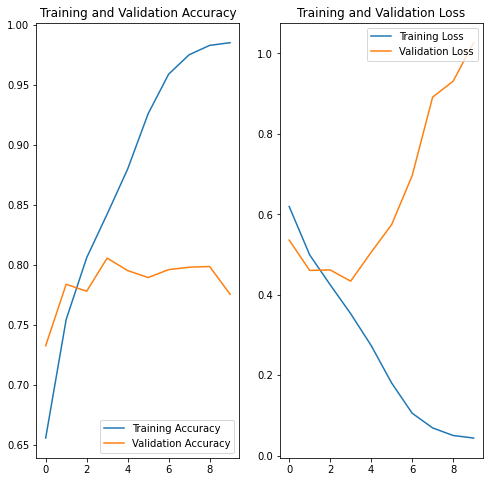

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# 数据增强

In [29]:
data_aug=keras.Sequential(
[
    layers.experimental.preprocessing.RandomFlip('horizontal',input_shape=(img_height,img_width,3)),#随机水平翻转
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1)
]
)

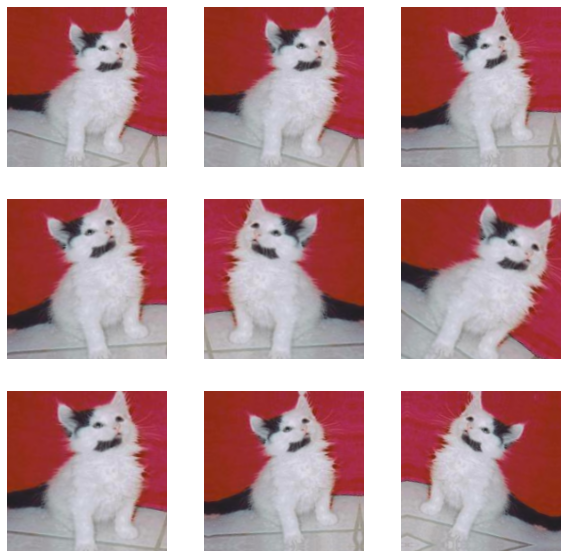

In [30]:
plt.figure(figsize=(10,10))
for images,_ in train_ds.take(1):
    for i in range(9):
        augimg=data_aug(images)
        ax=plt.subplot(3,3,i+1)
        plt.imshow(augimg[0].numpy().astype('uint8'))
        plt.axis('off')

# Dropout

In [31]:
model=Sequential(
[
    data_aug,  #先添加增强，就是相对数据进行增强处理
    layers.experimental.preprocessing.Rescaling(1./255,input_shape=(img_height,img_width,3)),#标准化层，原来用的flatten
    layers.Conv2D(16,3,padding='same',activation='relu'), #用了一个卷积层，设定16个卷积核，每个卷积核的大小是3*3，激活函数是relu
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'), #用了一个卷积层，设定16个卷积核，每个卷积核大小3*3，激活函数是relu
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'), #用了一个卷积层，设定16个卷积核，每个卷积核大小3*3，激活函数是relu
    layers.MaxPooling2D(),    
    layers.Dropout(0.2), #添加了Dropout
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes)
    
])

In [32]:
model.compile(
    optimizer='adam', # 优化器
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), #损失函数
    metrics=['accuracy'] #指标

)

In [33]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_2 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 45, 45, 64)       

In [34]:
epochs=15
history=model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/15
625/625 [==============================] - 11s 17ms/step - loss: 0.6256 - accuracy: 0.6477 - val_loss: 0.5413 - val_accuracy: 0.7248
Epoch 2/15
625/625 [==============================] - 10s 16ms/step - loss: 0.5372 - accuracy: 0.7307 - val_loss: 0.4884 - val_accuracy: 0.7722
Epoch 3/15
625/625 [==============================] - 10s 16ms/step - loss: 0.4994 - accuracy: 0.7563 - val_loss: 0.5042 - val_accuracy: 0.7528
Epoch 4/15
625/625 [==============================] - 10s 16ms/step - loss: 0.4653 - accuracy: 0.7808 - val_loss: 0.4247 - val_accuracy: 0.8146
Epoch 5/15
625/625 [==============================] - 10s 16ms/step - loss: 0.4348 - accuracy: 0.7982 - val_loss: 0.3997 - val_accuracy: 0.8204
Epoch 6/15
625/625 [==============================] - 10s 16ms/step - loss: 0.4167 - accuracy: 0.8099 - val_loss: 0.4210 - val_accuracy: 0.8014
Epoch 7/15
625/625 [==============================] - 10s 16ms/step - loss: 0.3988 - accuracy: 0.8205 - val_loss: 0.4311 - val_accuracy:

# 对未知数据进行预测

In [35]:
img=keras.preprocessing.image.load_img('../input/text00/cat.jpg',target_size=(img_height,img_width))
img_array=keras.preprocessing.image.img_to_array(img)
img_array=tf.expand_dims(img_array,0)

In [36]:
predictions=model.predict(img_array)
score=tf.nn.softmax(predictions[0])
imgname=class_names[np.argmax(score)]
print('给定的图片的类别是：',imgname)

给定的图片的类别是： cat


In [37]:
img=keras.preprocessing.image.load_img('../input/text00/dog.jpg',target_size=(img_height,img_width))
img_array=keras.preprocessing.image.img_to_array(img)
img_array=tf.expand_dims(img_array,0)

In [38]:
predictions=model.predict(img_array)
score=tf.nn.softmax(predictions[0])
imgname=class_names[np.argmax(score)]
print('给定的图片的类别是：',imgname)

给定的图片的类别是： dog
